In [87]:
import pandas as pd
import nltk
import string

# Baixa os recursos necessários do NLTK
nltk.download('punkt')        # Tokenizador pré-treinado
nltk.download('stopwords')    # Lista de stopwords (palavras irrelevantes) em vários idiomas
nltk.download('wordnet')      # Base de dados semântica usada na lematização (em inglês)

# Importa componentes do NLTK
from nltk.corpus import stopwords  # Lista de palavras irrelevantes para remoção
from nltk.stem import SnowballStemmer, RSLPStemmer, PorterStemmer, WordNetLemmatizer  # Stemmers e lematizador
from nltk.tokenize import TweetTokenizer  # Tokenizador ideal para textos informais (como tweets, emojis, hashtags)

from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rbeat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rbeat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rbeat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [72]:
df = pd.read_csv('database/aa_dataset-tickets-multi-lang-5-2-50-version.csv')

In [73]:
df.head(5)

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Vielen Dank für die Meldung des kritischen Sic...,Incident,Technical Support,high,de,51,Security,Outage,Disruption,Data Breach,NaN,NaN,NaN,NaN
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51,Product,Feature,Tech Support,NaN,NaN,NaN,NaN,NaN
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,51,Billing,Payment,Account,Documentation,Feedback,NaN,NaN,NaN
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,51,Product,Feature,Feedback,Tech Support,NaN,NaN,NaN,NaN


In [74]:
# Verificando quais idiomas estão os emails 
print("Idiomas: " + ', '.join(df['language'].unique().astype(str)))
# (DE- Alemão, EN- Inglês)

# Verificando quais categorias existem
print("Categorias: " + ", " .join(df['type'].unique().astype(str)))

Idiomas: de, en
Categorias: Incident, Request, Problem, Change


In [75]:
# Filtrando os emaisl apenas na lingua inglesa
english_df = df[df['language'] == "en"]

# Removendo colunas não utilizadas
english_df = english_df.drop(columns= ["answer", "queue", "priority", "language", "version", "tag_1", "tag_2", "tag_3", "tag_4", "tag_5", "tag_6", "tag_7", "tag_8"])

In [76]:
english_df

,subject,body,type
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...",Incident
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Request
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",Request
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Problem
5,Feature Query,"Dear Customer Support,\n\nI hope this message ...",Request
...,...,...,...
28578,Problem with Billing Adjustment,An unexpected billing discrepancy has been not...,Incident
28580,Urgent: Incident Involving Data Breach in Medi...,"A data breach has occurred, which might be rel...",Problem
28582,Performance Problem with Data Analytics Tool,The data analytics tool experiences sluggish p...,Incident
28585,Update Request for SaaS Platform Integration F...,Requesting an update on the integration featur...,Change


# Pré-processamento de texto

In [77]:
# Tokenizador e ferramentas
tokenizador = TweetTokenizer()
stemmer_en = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stopwords_en = set(stopwords.words('english'))

def pre_processamento(texto_en):
    # Garantir que o texto seja string
    texto_en = str(texto_en)

    # Tokenização
    tokens_en = tokenizador.tokenize(texto_en)

    # Tokens sem pontuação
    tokens_en_sem_pontuacao = [t for t in tokens_en if t not in string.punctuation]

    # Stopwords
    tokens_sem_stopwords_en = [t for t in tokens_en_sem_pontuacao if t.lower() not in stopwords_en]

    # Stemming
    stems_en = [stemmer_en.stem(t) for t in tokens_sem_stopwords_en]

    # Lematização
    lemmas_en = [lemmatizer.lemmatize(t.lower()) for t in tokens_sem_stopwords_en]

    return lemmas_en  # ou tokens_sem_stopwords_en, ou stems_en, conforme o que quiser usar

In [78]:
english_df['body_processado'] = english_df['body'].apply(pre_processamento)

In [79]:
english_df

,subject,body,type,body_processado
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...",Incident,"[dear, customer, support, team, n, ni, writing..."
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Request,"[dear, customer, support, team, n, ni, hope, m..."
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",Request,"[dear, customer, support, team, n, ni, hope, m..."
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Problem,"[dear, support, team, n, ni, hope, message, re..."
5,Feature Query,"Dear Customer Support,\n\nI hope this message ...",Request,"[dear, customer, support, n, ni, hope, message..."
...,...,...,...,...
28578,Problem with Billing Adjustment,An unexpected billing discrepancy has been not...,Incident,"[unexpected, billing, discrepancy, noticed, in..."
28580,Urgent: Incident Involving Data Breach in Medi...,"A data breach has occurred, which might be rel...",Problem,"[data, breach, occurred, might, related, outda..."
28582,Performance Problem with Data Analytics Tool,The data analytics tool experiences sluggish p...,Incident,"[data, analytics, tool, experience, sluggish, ..."
28585,Update Request for SaaS Platform Integration F...,Requesting an update on the integration featur...,Change,"[requesting, update, integration, feature, saa..."


In [81]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

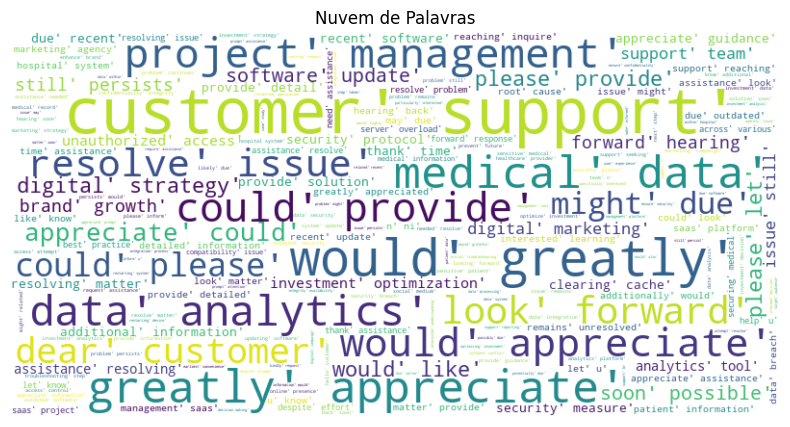

In [84]:
# Junta todos os textos em uma única string
texto = ' '.join(english_df['body_processado'].astype(str))

# Cria a nuvem de palavras
nuvem = WordCloud(
    background_color='white',
    stopwords=stopwords_en,
    width=800,
    height=400,
    colormap='viridis'
).generate(texto)

# Exibe a nuvem
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.imshow(nuvem, interpolation='bilinear')
plt.axis('off')
plt.title("Nuvem de Palavras")
plt.show()

## TF-IDF
Transforma texto em vetores numéricos com base na frequência relativa das palavras no documento comparada ao corpus inteiro.

In [99]:
# Converta para string, caso necessário
corpus = english_df['body'].astype(str)

# Inicializa o vetorizador TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')  # Pode incluir mais params como ngram_range, max_features, etc.
X_tfidf = vectorizer.fit_transform(corpus)

# Supondo que sua coluna 'body' já esteja pré-processada e unida como texto
corpus = english_df['body'].astype(str)

# Criar o vetor TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Limite de features, pode ajustar
tfidf_matrix = vectorizer.fit_transform(corpus)

# tfidf_matrix é uma matriz esparsa (documentos x palavras)
print("Shape:", tfidf_matrix.shape)

#  transformar em um DataFrame:
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf

Shape: (16338, 1000)


,10,13,19c,2021,365,ability,able,about,access,accessing,...,working,worried,would,writing,yet,yielded,you,your,zapier,zoho
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.180541,0.0,...,0.0,0.0,0.000000,0.125575,0.0,0.0,0.055548,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.087694,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.119009,0.198471,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.075105,0.000000,0.0,...,0.0,0.0,0.100729,0.000000,0.0,0.0,0.152887,0.056660,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.071561,0.000000,0.0,...,0.0,0.0,0.047988,0.000000,0.0,0.0,0.097115,0.107973,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.179267,0.159400,0.000000,0.0,...,0.0,0.0,0.106892,0.000000,0.0,0.0,0.216320,0.180379,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
16334,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
16335,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
16336,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.086185,0.000000,0.0,0.0,0.087208,0.000000,0.0,0.0
